**Task 1: Load Dataset**

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/concepts and technology of ai/bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Task 2: Check info**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**(a) Columns with dtype = object**

In [4]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


**(b) Unique values of those columns**

In [5]:
for col in object_cols:
    print(col, df[col].unique())


job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


**(c) Null values count**

In [6]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Task 3: Drop all object columns & save**

In [7]:
numeric_df = df.drop(columns=object_cols)
numeric_df.to_csv("banknumericdata.csv", index=False)



**Task 4: Read new CSV & summary statistics**

In [8]:
df2 = pd.read_csv("banknumericdata.csv")
df2.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**3.1 Problem 2 – Data Imputation (medical_student.csv)**

**Task 1: Load dataset**

In [9]:
df = pd.read_csv("/content/drive/MyDrive/concepts and technology of ai/medical_students_dataset.csv")


**Task 2: Check missing values**

In [10]:
df.isnull().sum()


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


**Task 3: Fill missing values**

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].median())      # numeric
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])  # categorical


**Task 4: Check duplicates**

In [13]:
df.duplicated().sum()
df = df.drop_duplicates()


**3.2 Titanic Dataset Tasks**

In [14]:
import pandas as pd
titanic = pd.read_csv("/content/drive/MyDrive/concepts and technology of ai/Titanic-Dataset.csv")


**Problem 1: Subset + Fare statistics**

In [15]:
subset = titanic[["Name","Pclass","Sex","Age","Fare","Survived"]]
subset = subset[subset["Pclass"] == 1]

subset["Fare"].mean()
subset["Fare"].median()
subset["Fare"].max()
subset["Fare"].min()


0.0

**Problem 2: Null values in Age + drop**

In [16]:
subset["Age"].isnull().sum()
subset = subset.dropna(subset=["Age"])


**Problem 3: One-Hot Encoding Embarked**

In [17]:
encoded = pd.get_dummies(titanic["Embarked"], prefix="Embarked")


**2. Add to DF**

In [19]:
titanic = pd.concat([titanic, encoded], axis=1)


**3. Drop original Embarked**

In [20]:
titanic = titanic.drop(columns=["Embarked"])


**4. Show first rows**

In [21]:
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,False,True


**Problem 4: Survival by Sex + Visualization**

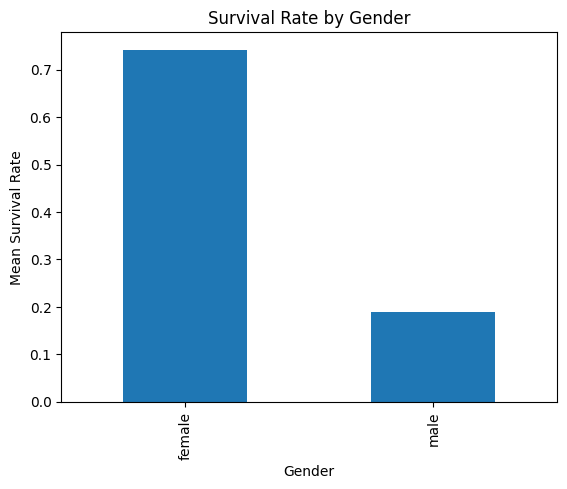

In [22]:
import matplotlib.pyplot as plt

titanic.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


**Problem 5: Survival by Embarked + Visualization**

In [25]:
titanic = pd.read_csv("/content/drive/MyDrive/concepts and technology of ai/Titanic-Dataset.csv")


<Axes: xlabel='Embarked'>

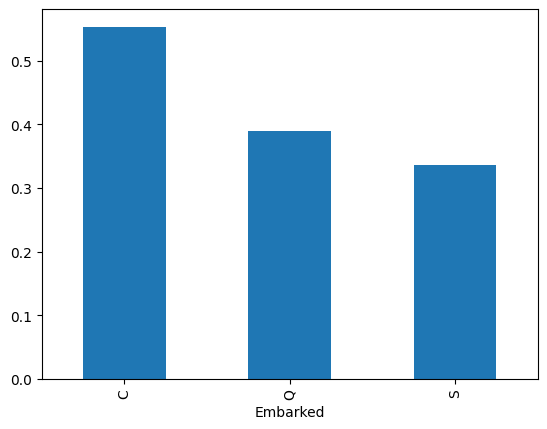

In [26]:
titanic.groupby("Embarked")["Survived"].mean().plot(kind="bar")


**Problem 6 (Optional): Survival by Age Quantiles + Class**

In [27]:
titanic["AgeGroup"] = pd.qcut(titanic["Age"], 5)

titanic.groupby(["Pclass","AgeGroup"])["Survived"].mean()


/tmp/ipython-input-4146030532.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["Pclass","AgeGroup"])["Survived"].mean()


Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64